# TEORI LINEAR REGRESSION

## APA itu Linear Regression?

Linear regression adalah algoritma untuk memprediksi nilai kontinu ( angka ) berdasarkan hubungan linear

### Formula:
$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

Dimana:
- $\hat{y}$ = prediksi
- $\theta_0$ = intercept (bias)
- $\theta_1, \theta_2, ...$ = coefficients

## 1.2 Cost Function ( Fungsi error )

kita perlu mengukur seberapa salah prediksi model. caranya dengan Mean Squared Error

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2$$

## 1.3 Cara Mencari θ Optimal

### Metode 1: Normal Equation
$$\theta = (X^T X)^{-1} X^T y$$

### Metode 2: Gradient Descent
$$\theta := \theta - \alpha \cdot \nabla J(\theta)$$

---

## 🧠 KONSEP PENTING: Gradient Descent

Bayangkan kamu di puncak gunung dan ingin turun ke lembah (minimum).

**Langkah-langkah:**
1. Lihat ke arah mana yang paling curam (gradient)
2. Ambil langkah ke arah itu
3. Ulangi sampai di lembah

**Learning Rate (α):** Seberapa besar langkahmu
- Terlalu besar → melompat melewati lembah (tidak converge)
- Terlalu kecil → terlalu lama sampai lembah


In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
print("succes")

succes


In [2]:
# Load Data
df = pd.read_csv('data/insurance.csv')

print("INFORMASI DATASET")
print(f"Shape : {df.shape}")
print(f"\nKolom : {list(df.columns)} " )
df.head()

INFORMASI DATASET
Shape : (330, 7)

Kolom : ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'] 


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# cek missing value
print("Tipe Data")
print(df.dtypes)
print(f"\nMissing values : {df.isnull().sum().sum()}")
print(f"\nstatistik")
df.describe().round(2)

Tipe Data
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Missing values : 0

statistik


,age,bmi,children,charges
count,330.00,330.00,330.00,330.00
mean,38.95,30.63,1.10,13880.69
std,14.28,5.69,1.19,12700.29
min,18.00,15.96,0.00,1137.01
25%,27.00,26.60,0.00,4672.65
50%,38.00,30.30,1.00,9525.29
75%,52.00,34.77,2.00,19073.96
max,64.00,49.06,5.00,51194.56


# EDA ( EXPLORATORY DATA ANALYSIS )

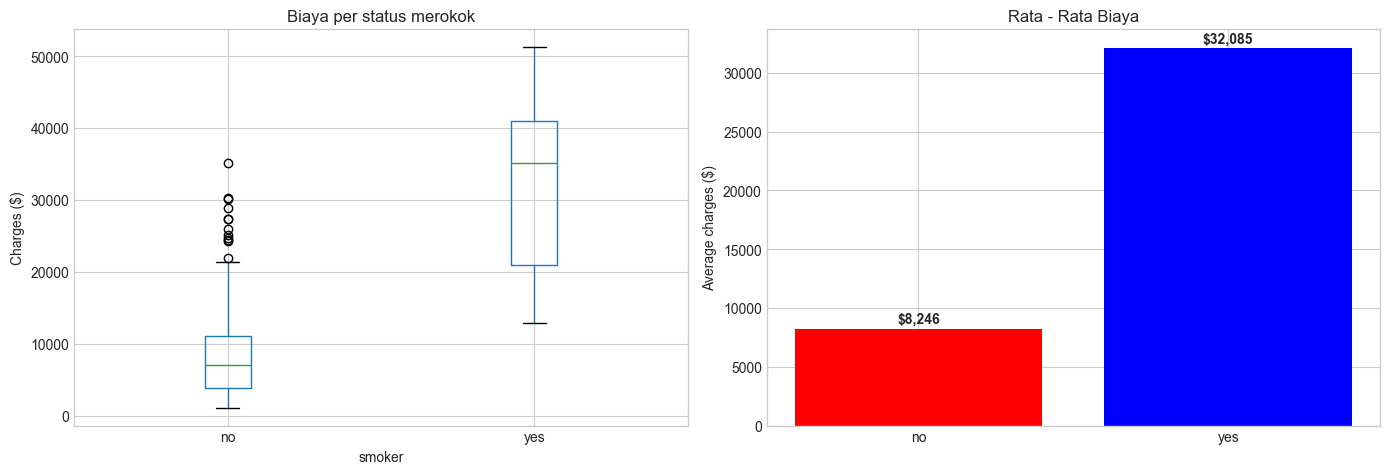

INSIGHT : perokok bayar 3.890865x lebih mahal


In [4]:
# VISUALISASI SMOKER VS NON SMOKER
fig, axes = plt.subplots(1,2 , figsize=(14,5))

# box plot
df.boxplot(column ='charges', by='smoker', ax=axes[0])
axes[0].set_title("Biaya per status merokok")
axes[0].set_xlabel("smoker")
axes[0].set_ylabel("Charges ($)")

# rata rata
avg_by_smoker = df.groupby('smoker')['charges'].mean()
axes[1].bar(avg_by_smoker.index, avg_by_smoker.values, color=['red','blue'])
axes[1].set_title('Rata - Rata Biaya')
axes[1].set_ylabel('Average charges ($)')
for i, v in enumerate(avg_by_smoker.values):
    axes[1].text(i, v+500, f'${v:,.0f}', ha='center', fontweight='bold')

plt.suptitle('')
plt.tight_layout()
plt.show()

ratio = avg_by_smoker['yes'] / avg_by_smoker['no']
print(f"INSIGHT : perokok bayar {ratio:1f}x lebih mahal")

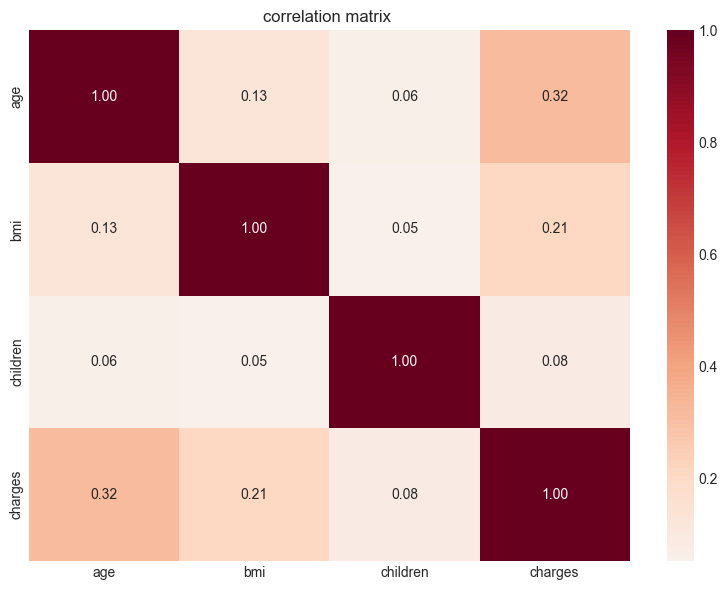

Korelasi dengan charges
age         0.319619
bmi         0.210930
children    0.081430
Name: charges, dtype: float64


In [5]:
# Correlation matrix
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('correlation matrix ')
plt.tight_layout()
plt.show()

print('Korelasi dengan charges')
print(df_numeric.corr()['charges'].drop('charges').sort_values(ascending=False))

# PREPROCESSING

In [6]:
# ENCODING KATEGORICAL
df_encoded = df.copy()
df_encoded['sex'] = df_encoded['sex'].map({'male':1, 'female':0})
df_encoded['smoker'] = df_encoded['smoker'].map({'yes':1, 'no':0})
df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)

print("after encoding")
df_encoded.head()

after encoding


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [7]:
# SPLIT DATA
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_arr = y_train.values
y_test_arr = y_test.values

print(f"Training : {X_train.shape[0]} samples")
print(f"Testing : {X_test.shape[0]} samples")

Training : 264 samples
Testing : 66 samples


# NORMAL EQUATION

In [9]:
class LinearRegressionNormalEq:
    """
    Linear Regression dengan normal equation
    formula : θ = (X^T X)^(-1) X^T y
    """

    def __init__(self):
        self.theta = None # Parameter yang akan di pelajari

    def fit(self, X, y):
        # step 1 : tambah kolom 1 untuk bias / intercept
        X_b = np.c_[np.ones((X.shape[0],1)), X]

        # step 2 : hitiung theta dengan normal equation
        # θ = (X^T X)^(-1) X^T y
        self.theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y
        return self

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0],1)), X]
        return X_b @ self.theta

    def score(self, X, y):
        return r2_score(y, self.predict(X))

    print("class normal equation dibuat")

class normal equation dibuat


# BATCH GRADIENT DESCENT

In [10]:
class LinearRegressionGD:
    """
    Linear regression dengan batch gradient descent
    Update: θ = θ - α * gradient
    """

    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate # seberapa besar langkah
        self.n_iter = n_iterations # berapa kali iterasi
        self.theta = None
        self.cost_history = [] # track biaya setiap iterasi

    def fit (self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        m, n = X_b.shape # m = jumlah sample, n = jumlah fitur

        # inisialisasi theta random
        np.random.seed(42)
        self.theta = np.random.randn(n) * 0.01

        # gradient descent loop
        for i in range(self.n_iter):
            # 1. hitung prediksi
            predictions = X_b @ self.theta

            # 2. hitung error
            errors = predictions - y

            # 3. hitung gradient
            gradient = (1/m) * (X_b.T @ errors )

            # 4. update theta
            self.theta = self.theta - self.lr * gradient

            # track cost 
            cost = (1/(2*m)) * np.sum(errors**2)
            self.cost_history.append(cost)

        return self

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return  X_b @ self.theta

    def score(self,X, y):
        return r2_score(y, self.predict(X))

print("class gradient descent dibuat!")

class gradient descent dibuat!


ALUR GRADIENT DESCENT
'''
1. INISIALISASI θ random
2. LOOP:
- prediksi :  ŷ = Xθ
- Hitung error: e = ŷ - y  
- Hitung gradient: g = X^T · e / m
- update: θ = θ - α·g
3. Ulangi sampai converge
```

In [11]:
# TRAINING SEMUA MODEL
results = []

# 1. Normal Equation
model_ne = LinearRegressionNormalEq()
model_ne.fit(X_train_scaled, y_train_arr)
r2_ne = model_ne.score(X_test_scaled, y_test_arr)
results.append({'Model': 'Normal Equation', 'R²': r2_ne})

# gradient descent
model_gd = LinearRegressionGD(learning_rate = 0.001, n_iterations=1000)
model_gd.fit(X_train_scaled, y_train_arr)
r2_gd = model_gd.score(X_test_scaled, y_test_arr)
results.append({'Model': 'Gradient Descent', 'R²': r2_ne})

# 3 . sklearn 
model_sk = LinearRegression()
model_sk.fit(X_train_scaled, y_train_arr)
r2_sk = model_sk.score(X_test_scaled, y_test_arr)
results.append({'Model': 'Sklearn', 'R²': r2_sk})

print("Hasil perbandingan")
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

Hasil perbandingan
           Model       R²
 Normal Equation 0.708954
Gradient Descent 0.708954
         Sklearn 0.708954


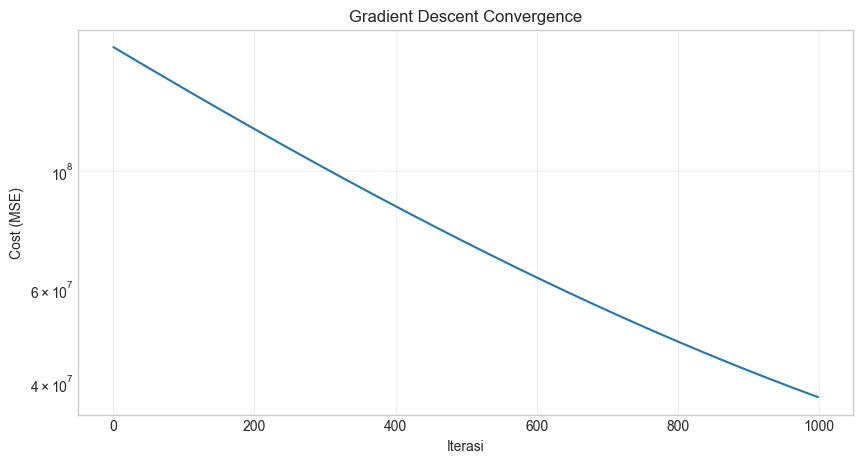


📉 Cost awal: 170,804,383
📉 Cost akhir: 37,578,519


In [14]:
# VISUALISASI CONVERGENCE
plt.figure(figsize=(10,5))
plt.plot(model_gd.cost_history)
plt.xlabel('iterasi')
plt.ylabel('cost (MSE)')
plt.title('Gradient Descent Convergence')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n📉 Cost awal: {model_gd.cost_history[0]:,.0f}")
print(f"📉 Cost akhir: {model_gd.cost_history[-1]:,.0f}")


In [15]:
print(f"Cost awal: {model_gd.cost_history[0]:,.2f}")
print(f"Cost akhir: {model_gd.cost_history[-1]:,.2f}")
print(f"Jumlah iterasi: {len(model_gd.cost_history)}")

Cost awal: 170,804,382.70
Cost akhir: 37,578,519.05
Jumlah iterasi: 1000
